In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
col_list = ["NEWEdImpt","JobSat","ConvertedComp"]
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv",usecols=col_list)
#data = data.replace('NA', np.nan)
data.dropna(inplace=True)
#data.head
#list(data.columns.values)
print(data.shape)

(34212, 3)


In [23]:
data['NEWEdImpt'].value_counts()
#data['Hobbyist'] = data[np.isfinite(data['Hobbyist'])]
data['NEWEdImpt'] = data['NEWEdImpt'].map({'Not at all important/not necessary': 1, 'Somewhat important': 2,
                                          'Fairly important': 3, 'Very important': 4,
                                    'Critically important': 5})
data['JobSat'].value_counts()
data['JobSat'] = data['JobSat'].map({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4,
                                    'Very satisfied': 5})
data['ConvertedComp'].value_counts()

120000.0     336
100000.0     301
150000.0     271
2000000.0    254
64859.0      253
            ... 
88899.0        1
137226.0       1
38800.0        1
88900.0        1
9076.0         1
Name: ConvertedComp, Length: 6898, dtype: int64

In [24]:
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].min())/(data['ConvertedComp'].max()-data['ConvertedComp'].min())
data['ConvertedComp'].value_counts()

0.060000    336
0.050000    301
0.075000    271
1.000000    254
0.032429    253
           ... 
0.054672      1
0.105552      1
0.012618      1
0.035334      1
0.007710      1
Name: ConvertedComp, Length: 6898, dtype: int64

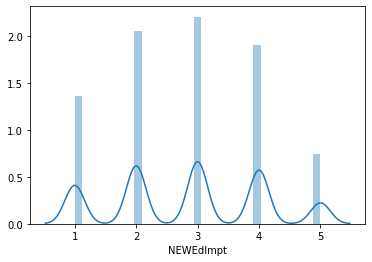

In [25]:
#histogram for normality check
#plt.hist(data['NEWEdImpt'])
#plt.show() 
sns.distplot(data['NEWEdImpt'])

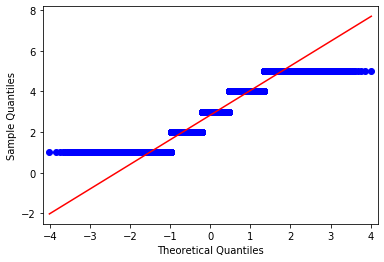

In [26]:
# q-q plot
qqplot(data['NEWEdImpt'], line='s')
plt.show()

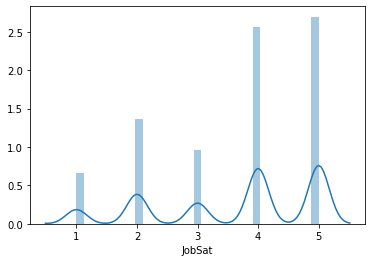

In [27]:
#plt.hist(data['JobSat'])
#plt.show() 
sns.distplot(data['JobSat'])

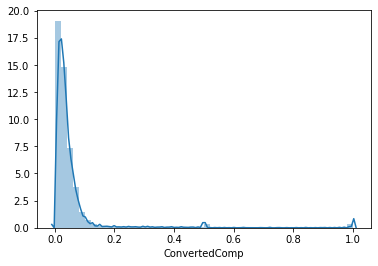

In [28]:
#plt.hist(data['ConvertedComp'])
#plt.show() 
sns.distplot(data['ConvertedComp'])

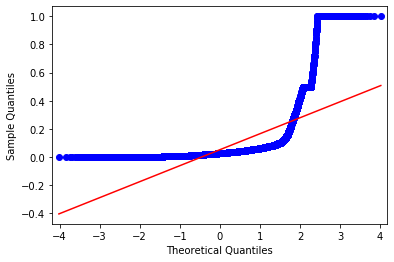

In [29]:
# q-q plot
qqplot(data['ConvertedComp'], line='s')
plt.show()

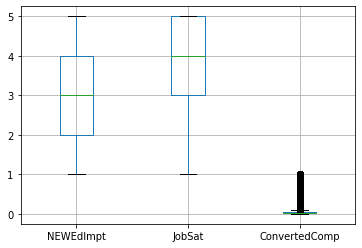

In [30]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

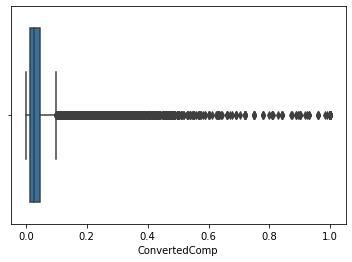

In [31]:
sns.boxplot(x=data['ConvertedComp'])

In [32]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ConvertedComp    0.035086
JobSat           2.000000
NEWEdImpt        2.000000
dtype: float64


In [33]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(31943, 3)

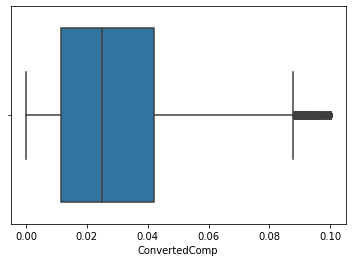

In [34]:
sns.boxplot(x=data_out['ConvertedComp'])

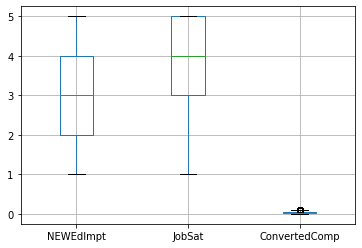

In [35]:
#checking equal variance with boxplot
boxplot = data_out.boxplot(column=['NEWEdImpt', 'JobSat', 'ConvertedComp'])

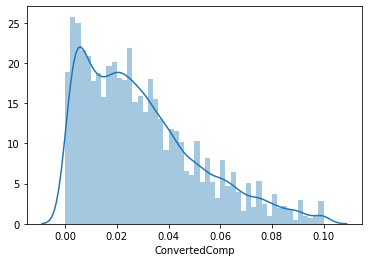

In [36]:
#plt.hist(data_out['ConvertedComp'])
#plt.show() 
sns.distplot(data_out['ConvertedComp'])

G:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


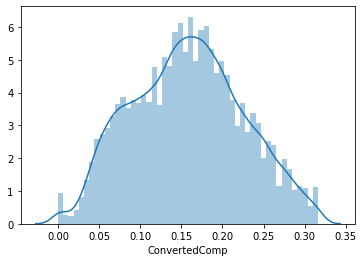

In [37]:
#sqrdata=data_out['ConvertedComp']**(.5)
data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
sns.distplot(data_out['ConvertedComp'])


In [38]:
#perform two-way ANOVA
model = ols('ConvertedComp ~ C(NEWEdImpt) + C(JobSat) + C(NEWEdImpt):C(JobSat)', data=data_out).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(NEWEdImpt),0.520120,4.0,29.537843,1.473144e-24
C(JobSat),4.730305,4.0,268.635944,1.675462e-227
C(NEWEdImpt):C(JobSat),0.084626,16.0,1.201485,2.573100e-01
Residual,140.507885,31918.0,NaN,NaN


In [39]:
#Since the p-values for NEWEdImpt and JobSat are both less than .05, 
#this means that both factors have a statistically significant effect on ConvertedComp.

#And since the p-value for the interaction effect is less than .05, 
#this tells us that there is significant interaction effect between NEWEdImpt and JobSat.